In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [ ]:
#INSPECTING the DATA

print(X.shape)
X.head()
y.head()

(303, 13)


,num
0,0
1,2
2,1
3,0
4,0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

df = pd.concat([X,y], axis=1)

#print the basic info
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
print("\nData Types:\n")
print(df.info())

# Print the Missing Values
print("\nMissing Values per Column:\n", df.isnull().sum())

#
print("\nTarget Value Counts:\n", df['num'].value_counts())

Shape: (303, 14)

Columns:
 ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

Data Types:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None

Missing Values per Column:
 age         0
sex      

In [ ]:
#Filling the Missing Values

df[['thal']].fillna(df['thal'].mode()[0])
df[['ca']].fillna(df['ca'].mode()[0])

,ca
0,0.0
1,3.0
2,2.0
3,0.0
4,0.0
...,...
298,0.0
299,2.0
300,1.0
301,1.0


In [ ]:
# Converting the target (num) values to binary

df['num']=df['num'].apply(lambda x:1 if x>0 else 0)
print(df['num'].value_counts)

<bound method IndexOpsMixin.value_counts of 0      0
1      1
2      1
3      0
4      0
      ..
298    1
299    1
300    1
301    1
302    0
Name: num, Length: 303, dtype: int64>


In [ ]:
X = df.drop('num', axis =1)   # axis=1 (dropping a column num and extracting all features)
y= df['num']

print(X.shape)
print (y.shape)

(303, 13)
(303,)


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

print(X.isna().sum())  # cuz there was one features with nan value and lr doesnt accept the nan values ex "ca" and "thal" has missing values



age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64


In [ ]:
#Splitting the dataset

from sklearn.model_selection import train_test_split

# splitting in 80 training - 20 testing

X_train , X_test, y_train , y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify = y)

print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)


X_train shape: (242, 13)
X_test shape : (61, 13)
y_train shape: (242,)
y_test shape : (61,)


In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()   #create a scaler object
# fit the scaler on training data and transform
X_train_scaled = scaler.fit_transform(X_train)
# scaler on test data to transform onlu
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape :", X_test_scaled.shape)



X_train_scaled shape: (242, 13)
X_test_scaled shape : (61, 13)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on scaled X train
model.fit(X_train_scaled, y_train)

#predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluation of the model
accuracy_lr = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy_lr)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)


Accuracy: 0.8688524590163934

Confusion Matrix:
 [[27  6]
 [ 2 26]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87        33
           1       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



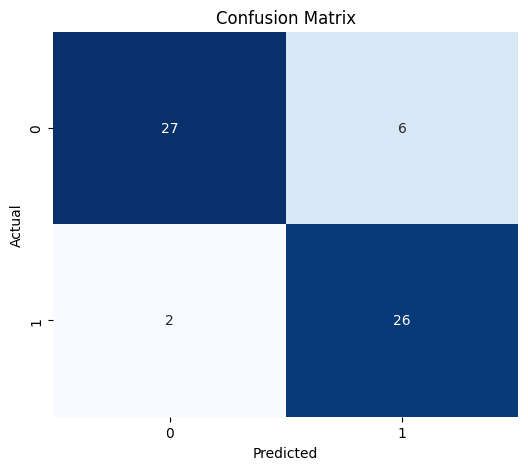

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Random_forest_classifier

rf_model = RandomForestClassifier (
    n_estimators = 100 ,
    random_state = 42
)


#training the  model on X_train_scaled


rf_model.fit(X_train_scaled, y_train)


#making predictions on test data

y_pred_rf = rf_model.predict(X_test_scaled)

#Evaluation
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("\nConfusion Matrix:\n", conf_matrix_rf)
print("\nClassification Report:\n", report_rf)

Random Forest Accuracy: 0.8852459016393442

Confusion Matrix:
 [[27  6]
 [ 1 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.82      0.89        33
           1       0.82      0.96      0.89        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.89        61



In [ ]:
print("Accuracy_lr:" , accuracy_lr)
print("Accuracy_rf:" , accuracy_rf)

Accuracy_lr: 0.8688524590163934
Accuracy_rf: 0.8852459016393442


In [ ]:
print(type(X_test_scaled))      # should be <class 'pandas.core.frame.DataFrame'> or np.ndarray
print(X_test_scaled.shape)      # should be (n_samples, n_features)
#print(shap_values[1].shape)     # should match (n_samples, n_features)


<class 'numpy.ndarray'>
(61, 13)


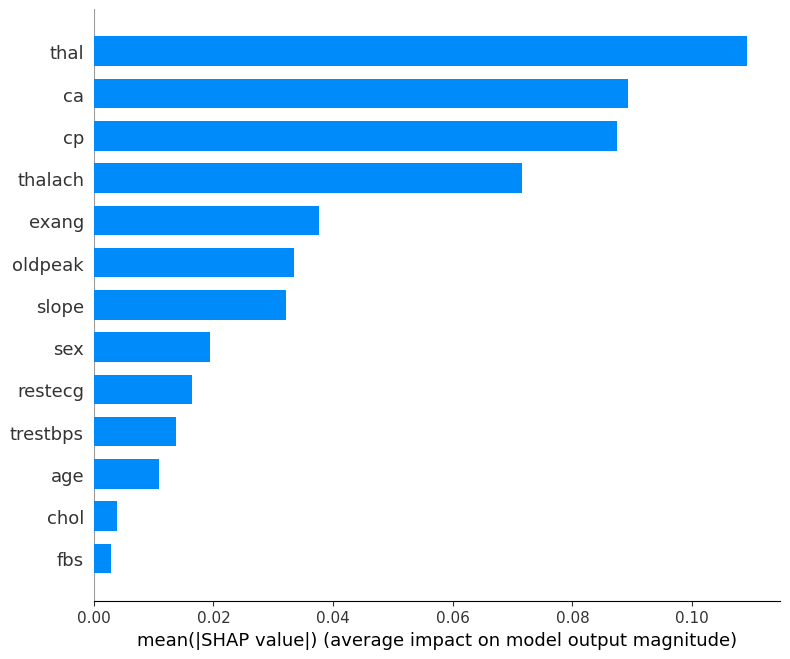

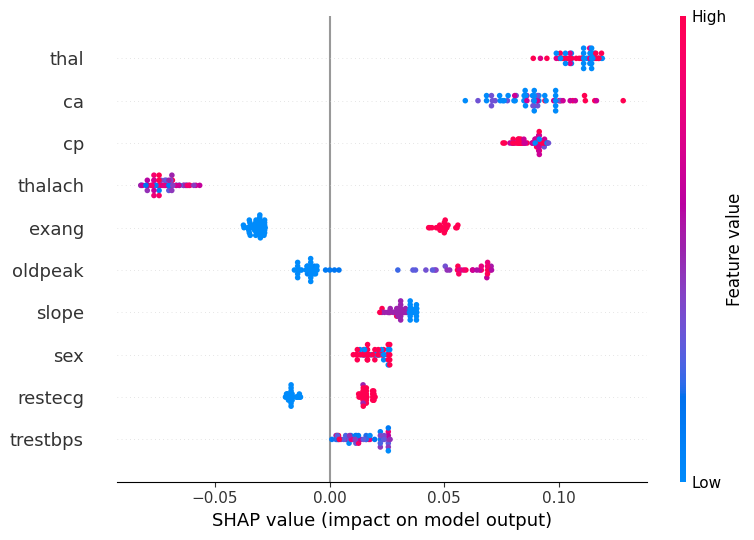

In [ ]:
import shap
import matplotlib.pyplot as plt

# SHAP with raw data
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)   # NOT scaled

class_index = 1  # disease class
shap_class = shap_values[:, :, class_index]

# Bar plot
shap.summary_plot(shap_class, X_test, plot_type="bar", max_display=15)

# Beeswarm
shap.summary_plot(shap_class, X_test, max_display=10)
